In [19]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats

In [20]:
# Importing data
data = pd.read_csv('data/data.csv')

In [21]:
data

,val,err
0,0.82,0.07
1,0.39,0.07
2,0.11,0.07
3,0.26,0.05
4,0.39,0.03
5,0.69,0.05
6,0.23,0.04
7,0.47,0.04
8,0.54,0.05
9,0.81,0.05


In [22]:
# a)
n = len(data['val'])

print('n =', n)

n = 20


In [23]:
# b)
K = n / np.sum(data['err']**(-2))

data['weight'] = K * data['err']**(-2)

print('K =', K)

K = 0.0016903756869546885


In [24]:
np.power(4, 1/2)

2.0

In [25]:
# c)
S_w = np.sum(data['weight'])

# arithmetic mean
y_m = np.sum(data['val']) / n #unweighted
y_m_w = np.sum(data['weight'] * data['val']) / S_w #weighted

print('S_w =', S_w)
print('\ny_m =', y_m)
print('y_m_w =', y_m_w)

# arithmetic mean error
md = np.mean(np.abs(data['val'] - y_m))
md_w = 1/S_w * np.sum(data['weight'] * np.abs(data['val'] - y_m_w))

print('\nmd =', md)
print('md_w =', md_w)

# geometric mean
y_g = np.power(np.prod(data['val']), 1/n)

print('\ny_g =', y_g)

# harmonic mean
y_h = n / np.sum(1 / data['val'])

print('\ny_h =', y_h)

# quadratic mean
y_q = np.sqrt(1/n * np.sum(data['val']**2))

print('\ny_q =', y_q)

# median
med = np.median(data['val'])

sorted_indices = np.argsort(data['val'])
sorted_data = data['val'][sorted_indices]
sorted_weights = data['weight'][sorted_indices]

cum_weights = np.cumsum(sorted_weights)
half_total_weight = np.sum(data['weight']) / 2

med_w = sorted_data[np.where(cum_weights >= half_total_weight)[0][0]]

print('\nmed =', med)
print('med_w =', med_w)


S_w = 19.999999999999993

y_m = 0.4805
y_m_w = 0.5006539664895479

md = 0.15565
md_w = 0.15061685384143003

y_g = 0.4349901830654691

y_h = 0.3816388792659733

y_q = 0.5220680032332953

med = 0.425
med_w = 0.41


In [26]:
# d)
y_min = np.min(data['val'])
y_max = np.max(data['val'])

rozp = y_max - y_min

print('y_min =', y_min)
print('y_max =', y_max)
print('\nrozp =', rozp)

y_min = 0.11
y_max = 0.97

rozp = 0.86


In [27]:
# e)
s_sqr = 1/(n-1) * np.sum((data['val'] - y_m)**2) #unweighted
s_w_sqr = 1/S_w * np.sum(data['weight'] * (data['val'] - y_m_w)**2) #weighted

print('s_sqr =', s_sqr)
print('s_w_sqr =', s_w_sqr)

s = np.sqrt(s_sqr)
s_w = np.sqrt(s_w_sqr)

print('\ns = sigma =', s)
print('s_w =', s_w)

md = 1/n * np.sum(np.abs(data['val'] - y_m))
md_w = 1/S_w * np.sum(data['weight'] * np.abs(data['val'] - y_m_w))

print('\nmd =', md)
print('md_w =', md_w)

absolute_deviations = np.abs(sorted_data - med)
mad = np.median(absolute_deviations)

def weighted_median(data, weights):
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumulative_weights = np.cumsum(sorted_weights)
    
    total_weight = np.sum(weights)
    median_weight = total_weight / 2
    median_index = np.where(cumulative_weights >= median_weight)[0][0]
    return sorted_data[median_index]

def wmad(data, weights):
    median = weighted_median(data, weights)
    
    absolute_deviations = np.abs(data - median)
    
    return weighted_median(absolute_deviations, weights)

mad_w = wmad(data['val'], data['weight'])

print('\nmad =', mad)
print('mad_w =', mad_w)

s_sqr = 0.04386815789473684
s_w_sqr = 0.04047914887147224

s = sigma = 0.20944726757524634
s_w = 0.20119430626007348

md = 0.15565
md_w = 0.15061685384143003

mad = 0.095
mad_w = 0.13000000000000006


In [28]:
# f)
cumulative_distribution = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

Q1 = np.percentile(sorted_data, 25)
Q2 = np.percentile(sorted_data, 50)
Q3 = np.percentile(sorted_data, 75)

print('Q1 =', Q1)
print('Q2 = median =', Q2)
print('Q3 =', Q3)

Q1 = 0.39
Q2 = median = 0.425
Q3 = 0.5475


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


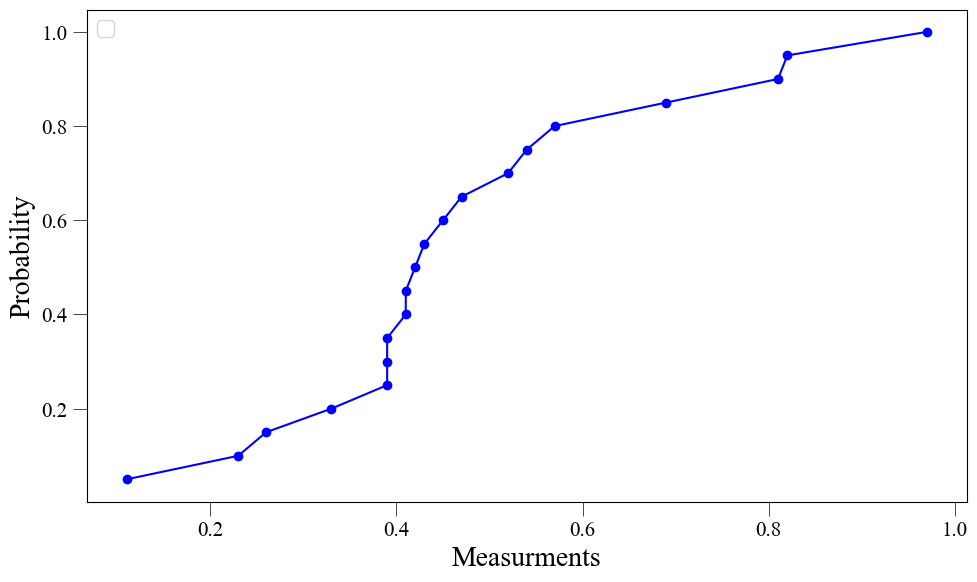

In [29]:
plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Measurments')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Probability')
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=15)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=15)
plt.tight_layout()  

ax.scatter(sorted_data, cumulative_distribution, color='b')
ax.plot(sorted_data, cumulative_distribution, color='b')

ax.legend(loc='upper left', fontsize=15)

plt.savefig('images/com_dist.png')

plt.show()

In [30]:
# g)
mu_a = np.mean(data['val'])
mu_m = np.median(sorted_data)

print('mu_a =', mu_a)
print('mu_m =', mu_m)

sigma_s = s * np.sqrt(n / (n - 1))
sigma_w = s_w * np.sqrt(n / (n - 1))

print('\nsigma_s =', sigma_s)
print('sigma_w =', sigma_w)

mu_a = 0.4805
mu_m = 0.425

sigma_s = 0.21488836243558954
sigma_w = 0.20642100278562597



n_h = 5


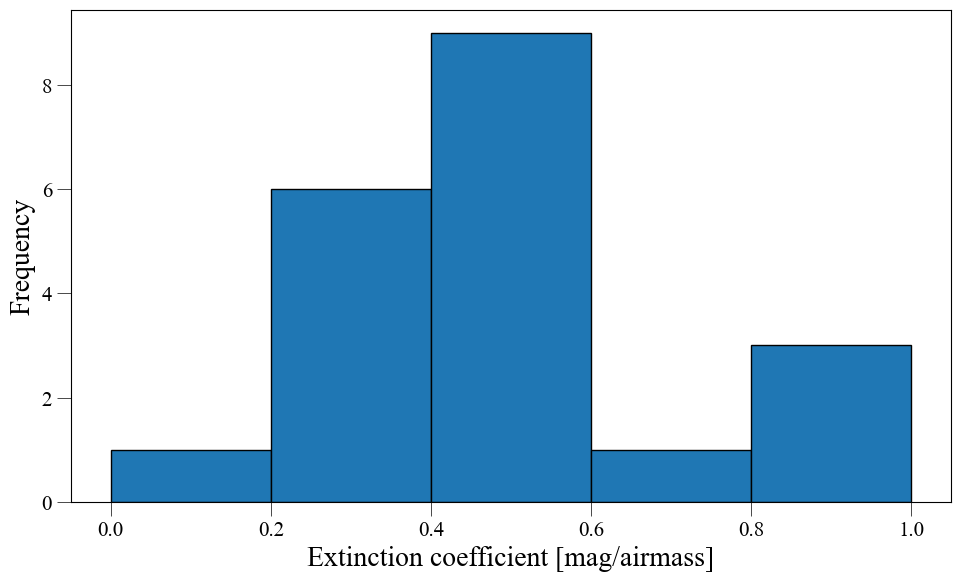

In [31]:
# i)
n_h = int(1 + 3.3 * np.log10(n))
print('\nn_h =', n_h)

bin_min = np.floor(y_min / 0.2) * 0.2
bin_max = np.ceil(y_max / 0.2) * 0.2
bins = np.arange(bin_min, bin_max + 0.2, 0.2)

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Extinction coefficient [mag/airmass]')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Frequency')
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=15)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=15)
plt.tight_layout()  

ax.hist(data['val'], bins=bins, edgecolor='black')

plt.savefig('images/histogram.png')

plt.show()


In [32]:
# j)
mode_value, count = stats.mode(data)

print('mode_value =', mode_value[0], 'count =', count[0])

mode_value = 0.39 count = 3.0


In [33]:
data['weight'] = data['weight'].round(3)

data.to_csv('data/data_proc.csv', index=False)